### **The effect of diversification**

You're going to compare performance of four individual stocks, to a portfolio of the same four stocks. You'll see that 2 out of the four stocks will under-perform over a time period of roughly four years, and two will perform quite well.

The stocks you're going to investigate are General Electric, JP Morgan, Microsoft and Proctor & Gamble.

Let's play a little game: pick one stock to invest in, then, let's see how it would have performed over time. There's a 50-50 chance that you'll pick a winning stock, versus a losing stock. Let's look at the data and see whether your stock is one of strong performers.

Available is a data set called `stock_returns` containing the cumulative returns of these four stocks over time, plus a portfolio of these stocks.

* Inspect the data stored under `stock_returns`. Check for which time period we have data on the stocks in the dataset by using the commands `.head()` and `.tail()`.
* For the moment of truth: plot the cumulative returns of the stocks using the function `plot_pct_returns()`. Did you pick a winning stock?

,GE,JPM,MSFT,PG,portfolio
date,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.963288,0.937910,0.981394,0.990491,0.968271
2015-01-06,0.920990,0.887662,0.952524,0.981424,0.935499
2015-01-07,0.921788,0.890542,0.977331,0.991818,0.945125
2015-01-08,0.944932,0.932789,1.035500,1.014595,0.981714


,GE,JPM,MSFT,PG,portfolio
date,,,,,
2018-03-21,0.107741,2.672268,2.955518,0.703671,1.357252
2018-03-22,0.065443,2.518963,2.840462,0.689739,1.288187
2018-03-23,0.043097,2.424868,2.728828,0.678682,1.240522
2018-03-26,0.028731,2.530485,3.011121,0.689739,1.296175
2018-03-27,0.072626,2.461994,2.826775,0.720257,1.293518


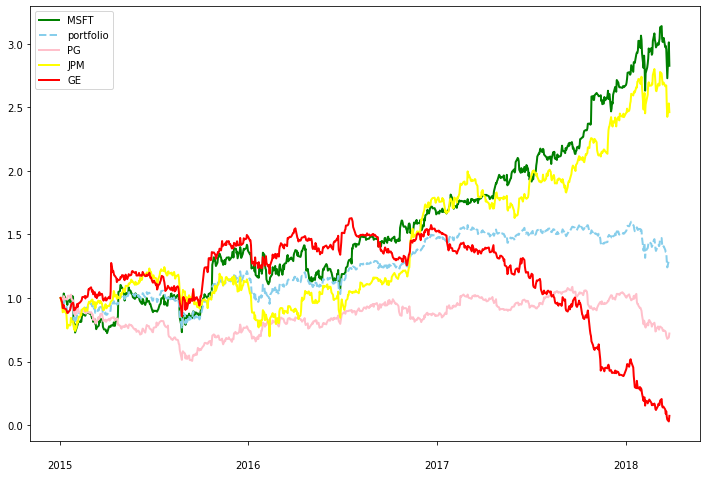

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


def plot_pct_returns(df):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(df.index, df.MSFT, marker='', color='green', linewidth=2, label="MSFT")
    ax.plot(df.index, df.portfolio, linewidth=2, linestyle='dashed', color='skyblue', label='portfolio')
    ax.plot(df.index, df.PG, marker='', color='pink', linewidth=2, label="PG")
    ax.plot(df.index, df.JPM, color='yellow', linewidth=2, label='JPM')
    ax.plot(df.index, df.GE, color='red', linewidth=2, label='GE')
    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
    #ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,4,7,10)))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
    #ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    plt.legend()
    plt.show()

stock_returns = pd.read_csv("stock_returns.csv", index_col="date", parse_dates=["date"])

# Check beginning and end of dataset
display(stock_returns.head())
display(stock_returns.tail())

# Plot percentage returns
plot_pct_returns(stock_returns)

# **Calculating Portfolio Weight**

$$Weight = \frac{Stock's \ value}{Total \ portfolio \ value} \times 100\%$$

### **Calculate mean returns**

Calculate performance for a four stock portfolio over the period January 2015 through March 2019. The portfolio consists of Proctor & Gamble, Microsoft, JP Morgan and General Electric stocks. You'll discover that <ins>*multiplying the mean return of each stock with its portfolio weight, is a very quick and straightforward way to calculate portfolio performance over a given period of time*</ins>.

The four columns in the DataFrame data contain the prices of these four stocks mentioned above. Have a look at data by inspecting it in the console.

* Calculate the percentage returns of the stocks in the DataFrame data by comparing today's price with yesterday's price.
* Calculate the mean returns of each stock in the new returns DataFrame.
* Assign the weights of the stocks to the weights array. The weights are `0.5`, `0.2`, `0.2` and `0.1`.
* Multiply the percentage returns with the weights, and take the total sum, to calculate the total portfolio performance and print the results.

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("small_portfolio.csv", index_col="date", parse_dates=["date"])

# Calculate percentage returns
returns = data.pct_change()

# Calculate individual mean returns 
meanDailyReturns = returns.mean()

# Define weights for the portfolio
weights = np.array([0.5, 0.2, 0.2, 0.1])

# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

# Print the portfolio return
print(portReturn)

-1.6782226618545547e-05


### **Portfolio cumulative returns**

To plot the development of the performance over time, you will need the <ins>*cumulative performance*</ins>, not the mean performance. Just like with interest in your bank account, the cumulative performance gives you the compounded return at each date in your dataset. It tells you; "up until today, this is what the total return has been since the start of my data."

Remember because of the compounding effect, you need to use `cumprod()` for this calculation. 

* Calculate the daily portfolio returns and assign it to a new column called `['Portfolio']` in the `returns` dataset. Use `dot` multiplication to multiply the `returns` data with the portfolio `weights`.
* Transform the daily returns dataset to a cumulative returns dataset by using the `cumprod()` function. Inspect what the data looks like by looking at the tail of the dataset.
* Plot the `daily_cum_ret.index`, which contains the dates, against the cumulative portfolio returns data, stored under `daily_cum_ret.Portfolio`. Inspect the plot. Do you know how to interpret this plot?

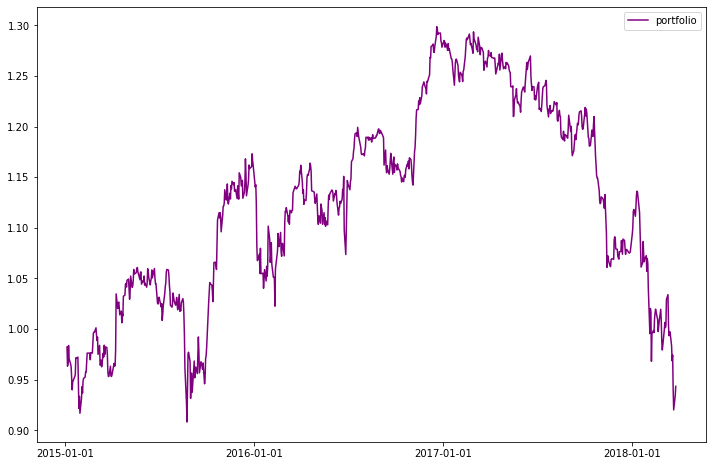

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

returns = pd.read_csv("small_portfolio.csv", index_col="date", parse_dates=["date"]).pct_change()

# Create portfolio returns column 
returns['Portfolio']= returns.dot(weights) # Dot product with the weight array

# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

# **Calculating Portfolio Variance**


\begin{align*}
\sigma^2_{pf} & = w_1^2\sigma_1^2 + w_2^2\sigma_2^2+2w_1w_2\rho_{12}\sigma_1\sigma_2 \\ 
& = \left[\begin{array}{cc}w_1 & w_2\end{array}\right]\left[\begin{array}{cc}\sigma_1^2 & w_1w_2\sigma_1\sigma_2\\ w_1w_2\sigma_1\sigma_2 & \sigma_2^2 \end{array} \right]\left[\begin{array}{c}w_1 \\ w_2 \end{array} \right]
\end{align*}

### **Portfolio variance**

Calculate the risk of 4-stock portfolio. Start with the pricing data, available under `data`. You'll have to calculate daily percentage returns and assign weights to your portfolio. You'll then continue by calculating the covariance matrix, and use the following formula: 

```
Portfolio variance = Weights transposed x (Covariance matrix x Weights) 
```

to get the final portfolio variance.

* Calculate the daily returns from the price data and create a NumPy array with the following portfolio weights: 0.05, 0.4, 0.3, 0.25.
* Create the covariance matrix from the `daily_returns` data. The multiplication with `250` is to account for 250 trading days in a year. Inspect the covariance matrix and make sure you understand the elements within it.
* Using the NumPy dot product function, apply the formula: *Portfolio variance = Weights transposed x (Covariance matrix x Weights)* on the `weights` and `cov_matrix` to calculate the portfolio variance. Print the portfolio variance.

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("small_portfolio.csv", index_col="date", parse_dates=["date"])

# Get percentage daily returns
daily_returns = data.pct_change()

# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

# Calculate the covariance matrix on daily returns
cov_matrix = (daily_returns.cov())*250
print("The covaraince matrix \n")
display(cov_matrix)

# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(f"\nPortfolio variance = {port_variance*100:.2f} %")


The covaraince matrix 



,GE,JPM,MSFT,PG
GE,0.045987,0.022828,0.016285,0.010101
JPM,0.022828,0.046660,0.024135,0.010812
MSFT,0.016285,0.024135,0.054054,0.014144
PG,0.010101,0.010812,0.014144,0.020645



Portfolio variance = 2.55 %


### **Standard deviation versus variance**

Both measures are used in practice to calculate market or stock volatility. Why should you use one or the other?

In the variance calculation we square the weights and the variances. Because of this squaring, the variance is no longer in the same unit of measurement as the original data. Taking the root of the variance means the standard deviation is restored to the original unit of measure and therefore much easier to interpret.

For instance, If a portfolio has a 12% average rate of return and a standard deviation of 4%, its return will range from 8-16%.

Let's calculate the standard deviation. Available are the `weights` and the `cov_matrix` from the above exercise.

* Re-create the calculation of the portfolio variance using `weights` and the `cov_matrix`. This time, take the square root of the whole calculation, to obtain the standard deviation instead.
* Print the standard deviation, the same way we did for the portfolio variance.

In [ ]:
import pandas as pd
import numpy as np

data_returns = pd.read_csv("small_portfolio.csv", index_col="date", parse_dates=["date"]).pct_change()
weights = np.array([0.05, 0.4, 0.3, 0.25])
cov_matrix = (daily_returns.cov())*250

# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Print the results 
print(f"Portfolio deviation = {port_standard_dev*100:.2f} %")

Portfolio deviation = 15.96 %


# **Annualized Returns**

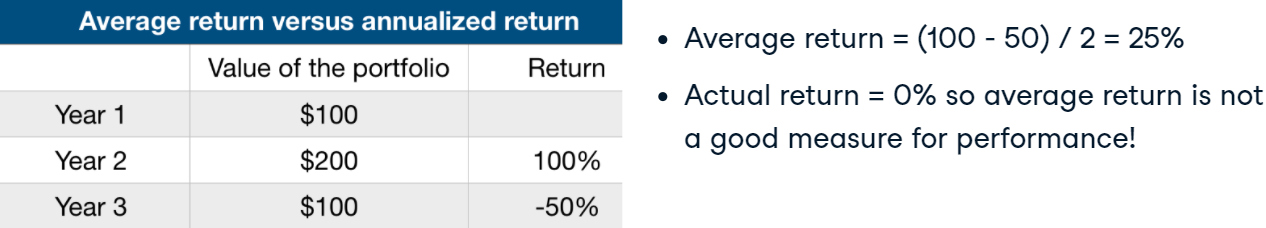

# **Calculating annualized returns**

**N in years**: $rate = (1 + return)^{\frac{1}{N}}-1$

สมมติต้องการหา return รายปี จากผลตอบแทนตลอด 5 ปี ใช้ 1/5 หรือ N = 5 

**N in months**: $rate = (1 + return)^{\frac{12}{N}}-1$

สมมติต้องการหา return รายปี จากผลตอบแทนทีรายเดือนในช่วง 6 เดือน ใช้ 12/6 หรือ N = 6

### **Annualizing portfolio returns**

Suppose you invested $101 at the beginning of 2015 in a portfolio. By the end of March 2018, you wonder how your portfolio has performed over time, and whether it is as good as another portfolio which started trading mid-2016. What performance metric do you look at? Well, the annualized return of course!

So let's calculate the annualized rate of return for your portfolio. Since our sample covers 3.2 years, let's use the monthly denomination in the formula for annualized returns. The number of months is already given under months.

Available are the data on portfolio returns under `pf_returns`, as well as as a separate series `pf_AUM` containing the portfolio's value, or assets under management (AUM). Good luck!

* Calculate the total rate of return from the first and last observation stored in the portfolios value series `pf_AUM`. Use indexing again to take the last and first observation from the series.

* Annualize the total rate of return by inputting the counted months in the formula, as well as the total return rate.

In [ ]:
import pandas as pd

months = 38
df = pd.read_csv("pf_AUM.csv")
pf_AUM = pd.Series(df['0'].values, index=df['date'])
pf_returns = pf_AUM.pct_change().drop("2015-01-02")

display(pf_AUM.head())
print("\n")
display(pf_returns.head())

# Calculate total rate of return from start to end
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

# Annualize return
annualized_return = ((1 + total_return)**(12/months))-1
print (annualized_return)

date
2015-01-02    101.000000
2015-01-05     99.667161
2015-01-06     98.088336
2015-01-07     99.042098
2015-01-08    101.637547
dtype: float64

date
2015-01-05   -0.013196
2015-01-06   -0.015841
2015-01-07    0.009724
2015-01-08    0.026206
2015-01-09   -0.010294
dtype: float64

0.1962393869689325


You can use annualized returns to compare portfolios with different time spans.

### **Comparing annualized rates of return**

In the last exercise, you saw that the annualized rate of return was 19.6%. That's pretty high! But since your portfolio consists of only 4 stocks, this high return is indeed possible as it is not very diversified. Let's compare the portfolio's annual rate of return, with that of the S&P500, which is much more diversified.

The value of the S&P500 between 1st of January 2015 and end of December 2018 has been made available. That's 4 years of data. You have full years this time, so use the year denomination in the formula for the annualized return. The data is stored under sp500_value.


* Calculate the total return over the four years from the first and the last observation in `sp500_value`.
* Calculate the annualized return from the `total_return` over four years.

In [ ]:
import pandas as pd

sp500_value = pd.read_csv("sp500.csv", parse_dates=["date"])
sp500_value = sp500_value[sp500_value["date"] < "2019-01-01"]
sp500_value = pd.Series(sp500_value["S&P500"].values, index=sp500_value["date"])

# Calculate the total return from the S&P500 value series
total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]
print(total_return)

# Annualize the total return spanning 4 years
annualized_return = ((1 + total_return)**(1/4))-1
print (annualized_return)

0.21798180822131397
0.050534212239337295


You'll see that the portfolio returns, although much higher (19.6%), might not be that great compared to the S&P500 (5.1%) after all, when you take risk into account.

# **Risk Adjusted Return**

* It defines an investment's return taking into account how much risk is involved.
* Typically expressed as a ratio of return relative to the risk taken

## **Sharpe Ratio**

$$Sharpe \ Ratio = \frac{R_p - R_f}{\sigma_p}$$

* $R_p$: Portfolio return
* $R_f$: Risk free rate of return
* $\sigma_p$: Portfolio standard deviation

The formula for $\sigma_p$

$$\sigma_p = \sqrt{\left[\begin{array}{ccccc}w_1 & w_2 & w_3 & \cdots & w_n\end{array}\right]\left[\begin{array}{cccc}\sigma_1^2 & w_1w_2\sigma_1\sigma_2 & w_1w_3\sigma_1\sigma_3 & \cdots & w_1w_n\sigma_1\sigma_n\\ w_1w_2\sigma_1\sigma_2 & \sigma_2^2 & w_2w_3\sigma_2\sigma_3 & \cdots & w_2w_n\sigma_2\sigma_n \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ w_1w_n\sigma_1\sigma_n & w_2w_n\sigma_2\sigma_n & w_3w_n\sigma_3\sigma_n & \cdots & \sigma_n^2 \end{array} \right]\left[\begin{array}{c}w_1 \\ w_2 \\ w_3 \\ \vdots \\ w_n \end{array} \right]}$$

When the *Sharpe ratio* is below 1, the return does not outweigh the risk proportionally. Although there might be other reasons to invest in such a portfolio, the *Sharpe ratio* doesn't indicate you are getting a great risk-return trade-off.  A *Sharpe ratio* of 1 and higher indicates that the returns on investment are proportional to the risk taken. 

## **Annualized Volatility**

$$\sigma_a = \sigma_m \times \sqrt{T}$$

* $\sigma_m$ is the measured standard deviation
* $\sigma_a$ is the annualized  standard deviation
* $T$ is the number of data points per year (เช่น ในอเมริกา มีการเปิดทำการซื้อขายหุ้น 250 วันต่อปี ก็ใช้ $T = 250$)

### **S&P500 Sharpe ratio**

Calculate the Sharpe ratio of the S&P500, starting with pricing data only using `sp500_value`. The risk-free rate is available as `rfr`, which is conveniently set to `0`. 

* Calculate the total return of the S&P500 pricing data `sp500_value` using indexing and annualize the total return number; the data spans 4 years.
* Calculate the daily returns from the S&P500 pricing data, you'll need this for the volatility calculation.
* Calculate the standard deviation from the returns data and annualize the number using `250` trading days.
* Finally, calculate the $Sharpe \ ratio$ using the annualized return and the annualized volatility and print the results.

In [ ]:
import pandas as pd 
import numpy as np

sp500_value = pd.read_csv("sp500.csv", parse_dates=["date"])
sp500_value = sp500_value[sp500_value["date"] < "2019-01-01"]
sp500_value = pd.Series(sp500_value["S&P500"].values, index=sp500_value["date"])
rfr = 0 

# Calculate total return and annualized return from price data 
total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(1/4))-1

### ในความคิดของเรา เราคิดว่าควรใช้ ((1 + total_return)**(365/sp500_value.size))-1
### เนื่องจากข้อมูลเป็นรายวัน

# Create the returns data 
returns_sp500 = sp500_value.pct_change()

# Calculate annualized volatility from the standard deviation
vol_sp500 = returns_sp500.std() * np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) / vol_sp500)
print(f"Sharpe Ratio = {sharpe_ratio:.2f}")

Sharpe Ratio = 0.37


### **Portfolio Sharpe ratio**

Calculate the $Sharpe  \ ratio$ of the portfolio. How do you think the portfolio $Sharpe \ ratio$ will be different to the S&P500 $Sharpe \ ratio$? You'll find out in this exercise.

You have the portfolio value over time under `pf_AUM` and the number of months for that data under months. Last, the risk-free rate is available under `rfr`, which is still set to zero.

* Calculate the total return from `pf_AUM` and annualized return for the period defined <ins>under months</ins>
* Calculate the annualized volatility, `vol_pf`, using the standard deviation of the returns. Use `250` trading days
* Calculate the $Sharpe \ ratio$. Don't forget to subtract the risk-free rate `rfr` from the annualized return.

In [ ]:
import pandas as pd

df = pd.read_csv("pf_AUM.csv")
pf_AUM = pd.Series(df['0'].values, index=df['date'])
months = 48

# Calculate total return and annualized return from price data 
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(12/months))-1

# Create the returns data 
pf_returns = pf_AUM.pct_change()

# Calculate annualized volatility from the standard deviation
vol_pf = pf_returns.std()*np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) / vol_pf)
print(f"Sharpe ratio = {sharpe_ratio:.2f}")

Sharpe ratio = 0.78


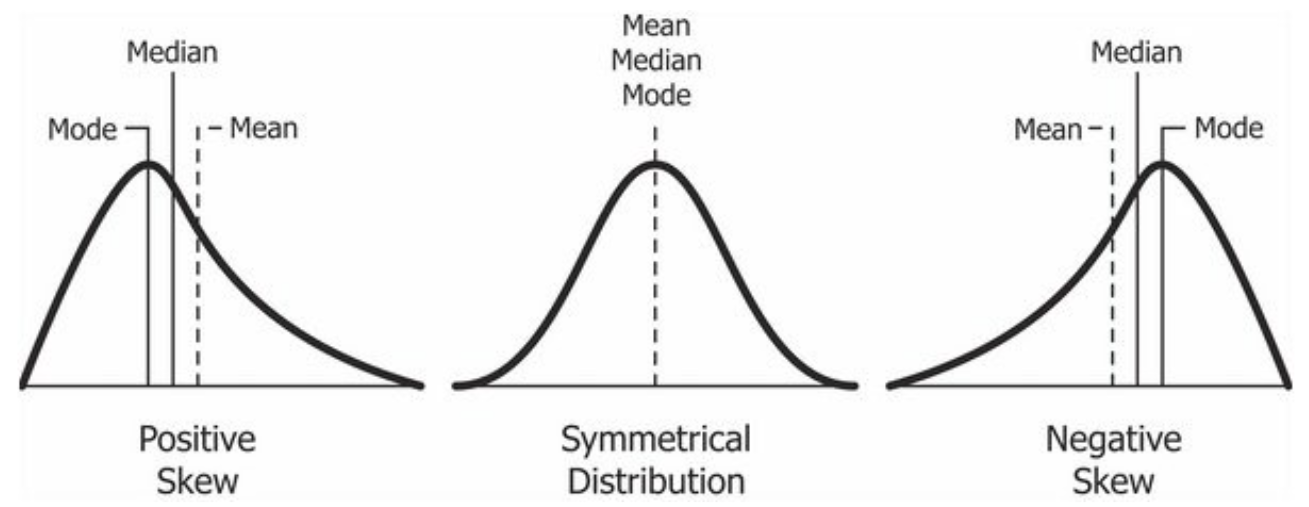

# **Coefficient of Skewness**

$$Skewness = \frac{3\times(mean - median)}{\sigma}$$

Rule of thumb: 
* $\left|Skewness\right| > 1 \Rightarrow$ Highly skewed distribution
* 0.5 < $\left|Skewness\right| < 1 \Rightarrow$ Moderately skewed
* $\left|Skewness\right| < 0.5 \Rightarrow$ Approximately symmetric

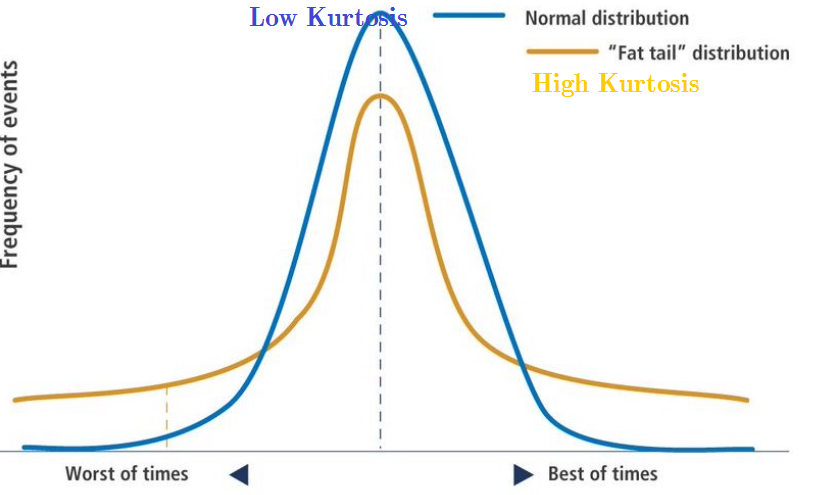

# **Kurtosis**

* Normal distribution has Kurtosis around 3.

### **Skewness of the S&P500**

* Create a histogram of your returns data with the `hist()` function, followed by `plt.show()` to see the plot.

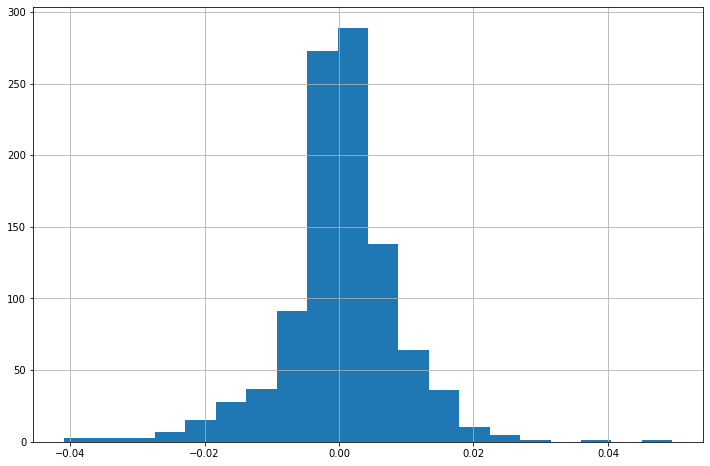

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 


sp500_value = pd.read_csv("sp500.csv", parse_dates=["date"])
sp500_value = sp500_value[sp500_value["date"] < "2019-01-01"]
sp500_value = pd.Series(sp500_value["S&P500"].values, index=sp500_value["date"])
returns_sp500 = sp500_value.pct_change()

# Create a histogram of the S&P500 returns and show the plot
returns_sp500.hist(figsize=(12, 8), bins=20)
plt.show()


### **Calculating skewness and kurtosis**


* Calculate the mean and the standard deviation.
* Calculate the skewness.
* Calculate kurtosis.

In [ ]:
import pandas as pd 

sp500_value = pd.read_csv("sp500.csv", parse_dates=["date"], index_col="date")
returns_sp500 = sp500_value.pct_change()

# Print the mean
print("mean : ", returns_sp500.mean()*100)

# Print the standard deviation
print("Std. dev  : ", returns_sp500.std()*100)

# Print the skewness
print("skew : ", returns_sp500.skew())

# Print the kurtosis
print("kurt : ", returns_sp500.kurtosis())

mean :  S&P500    0.0339
dtype: float64
Std. dev  :  S&P500    0.861002
dtype: float64
skew :  S&P500   -0.383199
dtype: float64
kurt :  S&P500    3.922391
dtype: float64


### **Comparing distributions of stock returns**

Compare the distributions of a singular stock with the portfolio, and see whether combining multiple stocks in a portfolio improves your returns distribution.

* Print the skewness and kurtosis of the stock returns data, you'll get all the numbers for the four stocks in the portfolio.
* Plot the histogram for the portfolio returns data and print skewness and kurtosis. Does is look better than the singular stock returns?

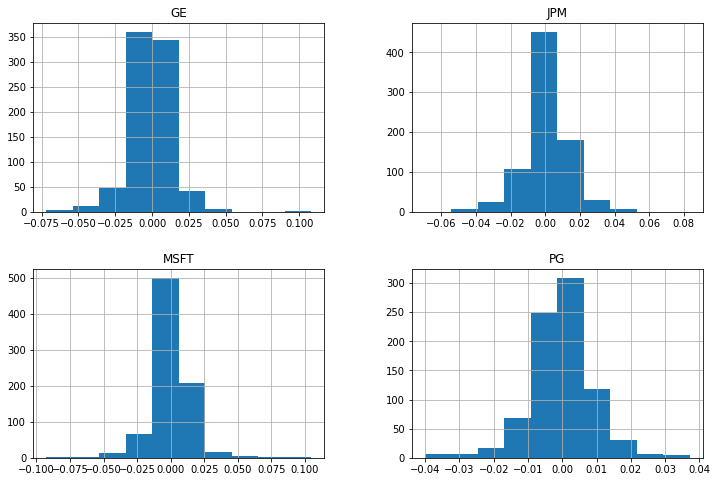

skew :  GE      0.177317
JPM     0.018812
MSFT    0.515411
PG     -0.259937
dtype: float64
kurt :  GE      7.766373
JPM     3.831427
MSFT    9.882108
PG      2.848092
dtype: float64


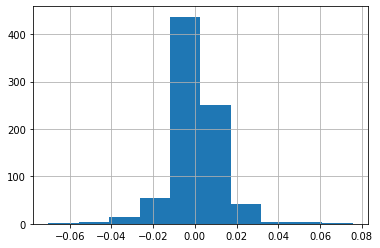

skew :  0.24634682702936894
kurt :  6.65178521514491


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

stock_returns = pd.read_csv("stock_returns_2.csv", index_col="date", parse_dates=["date"])
df = pd.read_csv("pf_AUM.csv")
pf_AUM = pd.Series(df['0'].values, index=df['date'])
pf_returns = pf_AUM.pct_change()

# Print the histograms of the stocks in the portfolio
stock_returns.hist(figsize=(12, 8))
plt.show()

# Print skewness and kurtosis of the stocks
print("skew : ", stock_returns.skew())
print("kurt : ", stock_returns.kurtosis())

# Print the histogram of the portfolio
pf_returns.hist()
plt.show()

# Print skewness and kurtosis of the portfolio
print ("skew : ", pf_returns.skew())
print ("kurt : ", pf_returns.kurtosis())

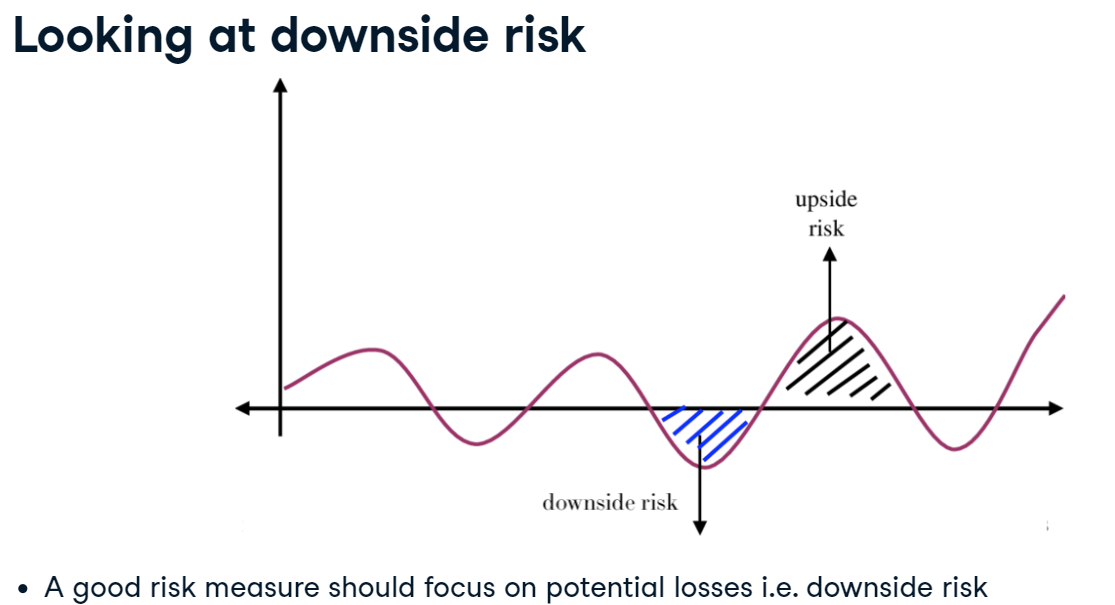

# **Sortino Ratio**

$$Sortino \ Ratio = \frac{R_p-R_f}{\sigma_d}$$

* $\sigma_d$ is the standard deviation of the downside only.

$$\text{Downside std.} = \sqrt{\frac{1}{N}\sum_{j=1}^N(\text{return} - \text{target return})^2\cdot\mathbf{1}(t)}$$

$$\mathbf{1}(t) = \left\{\begin{array}{cc}1 & \text{if return < target return} \\ 0 & \text{Otherwise} \end{array} \right.$$

# **Maximum Draw-Down**

The largest percentage loss from a market peak to trough

* ขึ้นกับช่วงระยะเวลาที่นำมาพิจารณาด้วย ถ้าช่วงสั้นๆก็เห็นร้อยละของ Draw-down น้อย

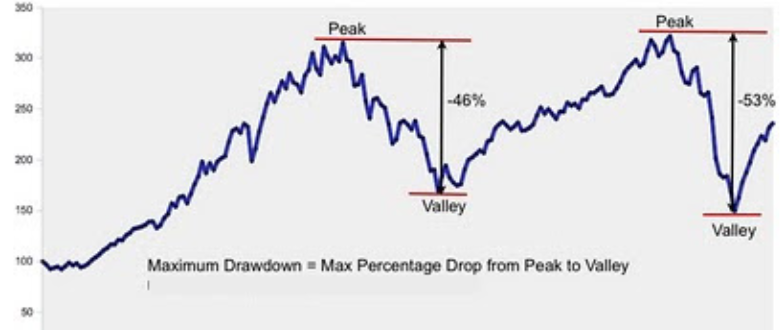

* หาราคาสูงสุด ในช่วงหนึ่งๆ

```
roll_max = stock_price.rolling(min_periods=1,window=250).max()
```

* หาค่า daily draw-down จากการเอา $\frac{\text{ราคาปัจจุบัน} - \text{ราคาสูงสุดที่ได้บันทึกค่าไว้}}{\text{ราคาสูงสุดที่ได้บันทึกค่าไว้}} = \frac{\text{ราคาปัจจุบัน}}{\text{ราคาสูงสุดที่ได้บันทึกค่าไว้}} - 1$

```
daily_drawdown = apple_price/roll_max - 1.0
```

* หาค่า draw-down ที่ต่ำที่สุด (ซึ่งจะมีค่าติดลบมากที่สุด)

```
max_daily_drawdown = daily_drawdown.rolling(min_periods=1,window=250).min()
```

### **Sortino ratio**

For this exercise, the portfolio returns data are stored in a DataFrame called `df`, which you'll use to calculate the $Sortino  \ ratio$. The $Sortino \ ratio$ is just like the $Sharpe \ ratio$, except for that it uses the <ins>standard deviation of the ***negative*** returns</ins> only, and thereby focuses more on the downside of investing.

Let's see how big the $Sortino \ ratio$ is compared to the earlier calculated $Sharpe  \ ratio$. The risk-free rate `rfr` and the target return target are already defined and are both zero.


* Select the returns using `.loc` that are strictly less than the `target`, and store them in a new DataFrame called `downside_returns`.
* Calculate the mean of the expected returns, and the standard deviation of the downside returns.
* Calculate the $Sortino \ ratio$ using `rfr` for the risk-free rate.

In [ ]:
import pandas as pd

pf_AUM = pd.read_csv("pf_AUM.csv")
pf_AUM.rename(columns={"0":"pf_returns"}, inplace=True)
df = pf_AUM.set_index("date").pct_change()

target, rfr = 0, 0

# Create a downside return column with the negative returns only
downside_returns = df.loc[df['pf_returns'] < target]

# Calculate expected return and std dev of downside
expected_return = df['pf_returns'].mean()
down_stdev = downside_returns['pf_returns'].std()

# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev

# Print the results
print("Expected return  : ", expected_return*100)
print("Downside risk   : ", down_stdev*100)
print("Sortino ratio : ", sortino_ratio)

Expected return  :  0.07742352764353044
Downside risk   :  0.8909196149493771
Sortino ratio :  0.08690293304175341


### **Maximum draw-down portfolio**

Calculate the maximum draw-down of the S&P500 (also known as "peak to trough performance drop"). Maximum draw-down is an incredibly insightful risk measure. It tells you what has been the worst performance of the S&P500 in the past years.

It is the reason why many investors shy away from crypto-currencies; nobody likes to lose a large percentage of their investment (e.g., 70%) in a short period.

In order to calculate the maximum draw-down of the S&P500, the daily S&P500 prices have been made available to you in a DataFrame called `df`.

* Taking a window of `252` trading days, find the rolling maximum value of the S&P500 prices in `df` and calculate daily draw-downs by dividing the prices in `df` by `roll_max`.

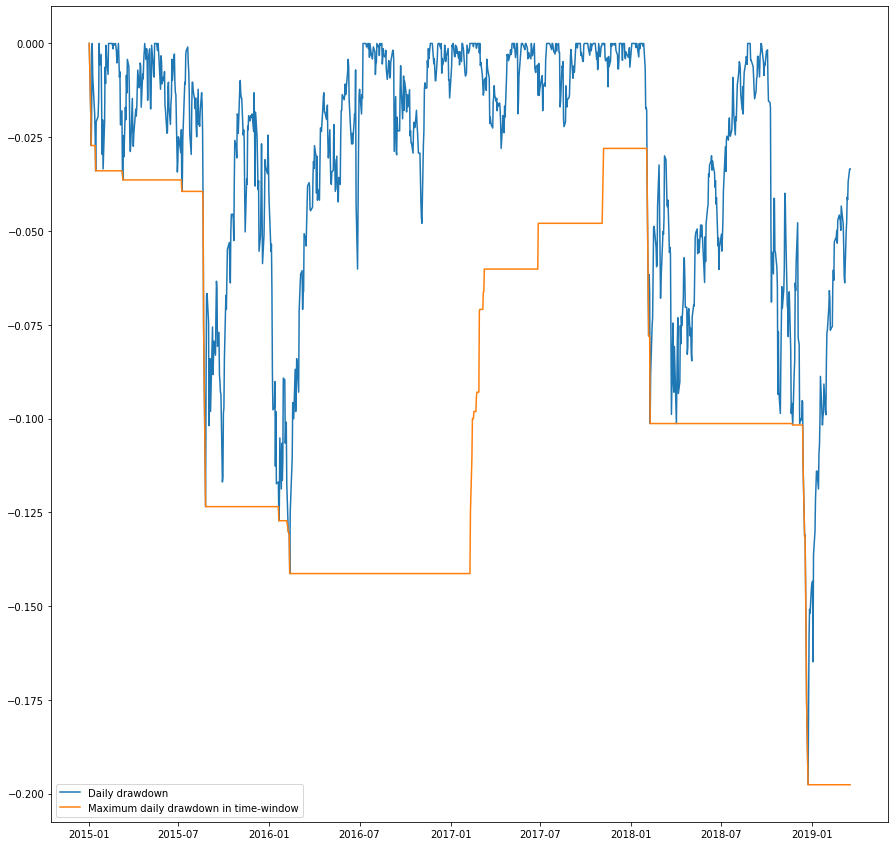

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sp500.csv", parse_dates=["date"], index_col="date")
df["S&P500"] = df["S&P500"].astype(int)

# Calculate the max value 
roll_max = df.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = df/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(daily_draw_down.index, daily_draw_down, label='Daily drawdown')
plt.plot(max_daily_draw_down.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

During 2018-12 to 2019-01, this shows that the portfolio dropped the most in performance in one day.

### **Active return**

Calculate the active return of a portfolio against a benchmark. You've learned many ways of how to calculate total return over a period. For this exercise, you'll use the simple *mean returns multiplied with the weights* to obtain a total return for both the portfolio as well as the benchmark. Available is portfolio data containing weights and asset returns under `portfolio_data`. Have a look at the data by running `portfolio_data.head(10)`.


* Inspect the portfolio weights by checking whether they sum up to 100%, by using the `.sum()` function on the `pf_weights` column.
* Calculate the portfolio return and benchmark return by multiplying the respective weight columns with the mean returns of the assets, and summing that to get the total return.

In [ ]:
import pandas as pd

portfolio_data = pd.read_csv("large_pf.csv", index_col="Unnamed: 0")

# Calculate return of the portfolio
total_return_pf = (portfolio_data['pf_weights']*portfolio_data['mean_return']).sum()

# Calculate return of the benchmark
total_return_bm = (portfolio_data['bm_weights']*portfolio_data['mean_return']).sum()

# Calculate and print the active return
active_return = total_return_pf - total_return_bm
print ("%.2f%%" % active_return)

22.58%


### **Industry attribution**

Calculate the relative industry position of your portfolio, versus a benchmark. As a portfolio manager you need to understand your portfolio's underweight and overweight positions (or "industry bets"), as they are a large driver of performance, as well as a potential source of risk.

The DataFrame `portfolio_data` is available, containing details about the industry classification, obtained from the Global Industry Classification System or "GICS", of your portfolio holdings, as well as your portfolio weights and the benchmark weights.

* Inspect the weights of your portfolio `pf_weights`, and of the benchmark under `bm_weights`. To make sure that the weights are correct, double check that the weights sum up to 100%.
* Collapse the DataFrame on the GICS Sector using the `groupby` command, to be able to see performance and weights on a sector level. Make sure to sum the `groupby`, to get the summed values for each column.
* Now calculate the active weights of the portfolio by comparing the portfolio weights in the column `pf_weights`, with the benchmark weights in the column `bm_weights`. Inspect the active weights.
* 

In [ ]:
# Print the sum of the bm and pf weights
print (portfolio_data.bm_weights.sum())
print (portfolio_data.pf_weights.sum())

# Group dataframe by GICS sectors 
grouped_df=portfolio_data.groupby('GICS Sector').sum()

# Calculate active weights of portfolio
grouped_df['active_weight'] = grouped_df['pf_weights']-grouped_df['bm_weights']
print(grouped_df['active_weight'])

100.001
100.0
GICS Sector
Consumer Discretionary         20.257
Consumer Staples               -5.176
Energy                          0.000
Financials                     -2.116
Health Care                     2.865
Industrials                     2.465
Information Technology          8.693
Materials                      -2.043
Real Estate                     2.014
Telecommunications Services    -1.367
Utilities                     -25.593
Name: active_weight, dtype: float64


From the above, we can see that

* The portfolio is overweight Consumer Discretionary which lead to a positive performance versus benchmark.
* The portfolio is neither underweight, or overweight on Energy.
* The portfolio is underweight on 5 sectors, as well as overweight on 5 sectors, and these weights balance each other out.

# **Risk Factors**

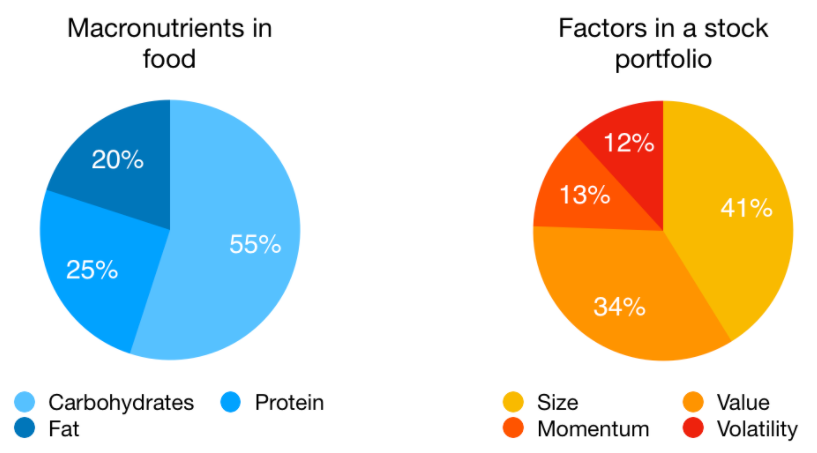

Factors are combined characteristics of the assets in portfolio and they are elements that make up a portfolio return.

* Size (usually measured by Market Capitalization)
* Strong financial fundamentals
* Volatility
* Value
* Momentum
* etc.

### **Size factor**

Stocks with a **lower market value** (mid and small caps) typically **realize higher returns** than those with a higher market value or capitalization (large caps). The **size factor** measures this **difference in return** between small cap companies relative to large cap companies. Suppose you would take the correlation of the S&P500 returns and the size factor returns. What would you expect to find?

he S&P500 consist mostly of large cap companies. Since the size factor returns are positive when small cap companies do well relative to large cap, the two should be negatively related to each other.


### **Momentum factor**

Find the correlation of the S&P500 returns with 2 factors, **momentum** and **value**.

A stock is showing **"momentum"** if its *prior <ins>12-month average</ins> of returns is positive*. The momentum factor is therefore formed by combining stocks that show consistent positive historic returns. The value factor looks at stocks that are inexpensive relative to some measure of fundamental value. For example price-to-earnings and price-to-book are typically ratios to measure "value". Let's see how our S&P500 returns relate to the returns of these factors.

Available is a DataFrame `df` containing the returns of the two factors and the S&P500 over time.

* Create a new column in `df` containing the 20-day rolling correlation between the **S&P500 returns** and the **momentum** factor, let's call it `correlation_mom`.
* Create another new column in `df` containing the 20-day rolling correlation between the **S&P500 returns** and the **value** factor, let's call it `correlation_value`.
* Plot both rolling correlation coefficients using the function `.plot()` on the new columns.
* 

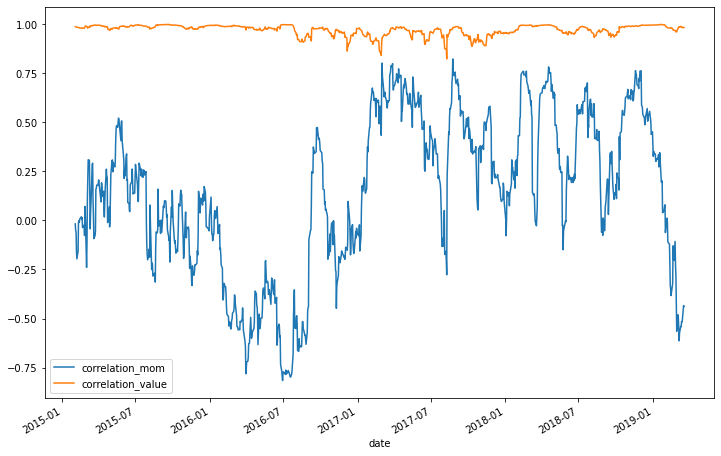

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("factors.csv", parse_dates=["date"], index_col="date").drop(columns="Unnamed: 0")

# Calculate 20-day rolling correlation with momentum 
df['correlation_mom']=df['sp500'].rolling(20).corr(df['momentum'])

# Calculate 20-day rolling correlation with value
df['correlation_value']=df['sp500'].rolling(20).corr(df['value'])

# Plot the correlations
df['correlation_mom'].plot(figsize=(12,8))
df['correlation_value'].plot(figsize=(12, 8))
plt.legend()
plt.show()

### **Value factor**

In the previous exercise you've looked at the S&P500 exposures, and saw that ***there was a large consistent exposure to the value factor***, but a very fluctuating correlation to momentum.

Let's now check how our portfolio measures up to this, and let's especially focus on value. Available to you is a DataFrame called `factor_data` containing the factor returns as well as your portfolio returns. Start by inspecting the DataFrame `factor_data`.

* Calculate the simple pairwise correlation of the columns in the dataframe `factor_data`.
* Create a new column in `factor_data` called `correlation_value`, and assign the rolling correlation between your portfolio and the value factor to it, using a `5` day window. Plot your results.

,momentum,value,portfolio
momentum,1.000000,-0.363237,0.001012
value,-0.363237,1.000000,0.767663
portfolio,0.001012,0.767663,1.000000


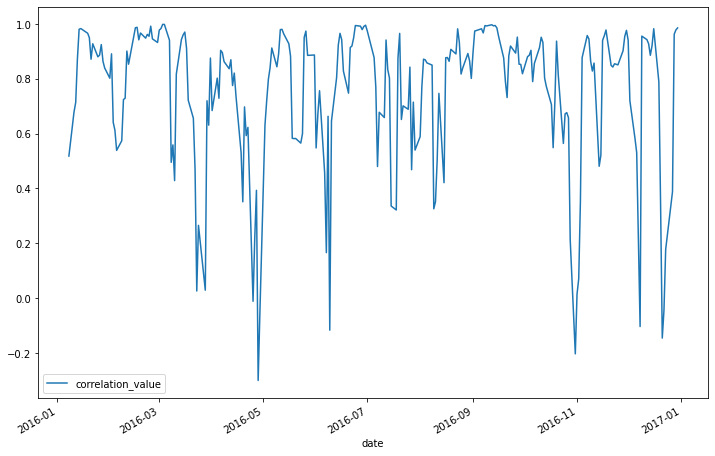

In [ ]:
import pandas as pd

factor_data = pd.read_csv("factor_data.csv", index_col="date", parse_dates=["date"]).drop(columns="Unnamed: 0")

# Calculate the pairwise correlation
display(factor_data.corr())

# Calculate rolling 5 day correlation 
factor_data['correlation_value'] = factor_data['portfolio'].rolling(5).corr(factor_data['value'])

# Plot the rolling correlation
factor_data['correlation_value'].plot(figsize=(12,8))
plt.legend()
plt.show()

In the correlation graph between your portfolio and the value factor, you see that it fluctuates and dips to a low correlation occasionally. What could be the reason the correlation suddenly dips?

* By changing your portfolio weights based on your investment strategy, the underlying factor exposures also change.
* The underlying returns of the stocks that make up the total value factor returns can fluctuate heavily, causing the factor returns to deviate from your portfolios return.
* The composition of the value factor changes over time, i.e. the stocks that are deemed high "value" will change over time, and thereby the factor returns can deviate from the portfolio returns.

# **Fama French Multi Factor Model**

$$R_{pf} = \alpha + \beta_mMKT + \beta_sSMB + \beta_hHML$$

* $MKT = R_{market} - R_{riskfree}$: Excess return of the market
* $SMB$ (Small minus Big :: A Size Factor) The excess return of stocks with small market capitalization over those with largeer market capitalization
* $HML$ (High minus Low :: A Value Factor) The excess return of value stocks where values stocks are stocks having a higher book to price ratio (B/P) compared to other stocks.

In [ ]:
import pandas as pd
import statsmodels.api as sm

factor_data = pd.read_csv("factors.csv", index_col="date", parse_dates=["date"]).drop(columns="Unnamed: 0")
factor_data = factor_data.iloc[1:]

model = sm.OLS(factor_data['sp500'], factor_data[['momentum', 'value']]).fit()
predictions = model.predict(factor_data[['momentum', 'value']])
β1, β2 = model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sp500   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          1.608e+04
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                        0.00
Time:                        17:51:06   Log-Likelihood:                          481.20
No. Observations:                1058   AIC:                                     -958.4
Df Residuals:                    1056   BIC:                                     -948.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
momentum      -0.0435      0.007     -6.381      0.000      -0.057      -0.030
value          0.9662      0.005    179.052      0.000       0.956       0.977
==============================================================================
Omnibus:                       13.376   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.591
Skew:                           0.074   Prob(JB):                     3.38e-05
Kurtosis:                       3.667   Cond. No.                         1.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Fama French factor correlations**

In this exercise you want to check how much correlation your portfolio returns have with the Fama French factors. With a quick correlation table, you can very easily gain insight into how your portfolio returns move with for example the excess market return or the size and value factors. Remember, the Fama French factor model was defined as follows:

$$R_{pf} = \alpha + \beta_mMKT + \beta_sSMB + \beta_hHML$$

Available is the data containing the factor returns and your portfolio returns under `factor_returns`. 

* Obtain the pairwise correlations of your dataset `factor_returns` and interpret the results.

In [ ]:
import pandas as pd

factor_returns = pd.read_csv("factors_pf_returns.csv", index_col="date", parse_dates=["date"])
display(factor_returns.head())

# Print the correlation table 
print("\n",factor_returns.corr())


,Mkt-RF,SMB,HML,RF,pf_returns
date,,,,,
2016-01-04,-1.59,-0.83,0.53,0.0,-1.651745
2016-01-05,0.12,-0.22,0.01,0.0,0.408161
2016-01-06,-1.35,-0.12,0.00,0.0,0.325555
2016-01-07,-2.44,-0.29,0.08,0.0,-0.698259
2016-01-08,-1.11,-0.47,-0.03,0.0,-0.959352



               Mkt-RF       SMB       HML        RF  pf_returns
Mkt-RF      1.000000  0.331250  0.099800  0.087073    0.738586
SMB         0.331250  1.000000 -0.108081  0.076750    0.162303
HML         0.099800 -0.108081  1.000000 -0.049019   -0.237647
RF          0.087073  0.076750 -0.049019  1.000000    0.039383
pf_returns  0.738586  0.162303 -0.237647  0.039383    1.000000


Based on what you see in the correlation table, do you think this portfolio manager has strong strategic investment skills?

The returns seem not very highly correlated to the factors, but the correlation with the market returns is actually quite high, at around 0.74.  That's a lot of performance coming from simple market movements.

The answer is No.  Because the performance of this portfolio can largely be explained by market returns, but not so much by factor returns.

### **Linear regression model**

In this exercise you're going to use the **Fama French** model to explain the returns in your portfolio. You'll first walk through the linear regression model taking all the different steps, and obtain the summary at the end to interpret the results.

Available is a dataset called `factor_returns` which contains portfolio returns as well as the Fama French factors. Good luck!

* Define and fit the linear regression model. Use the three Fama French factors, i.e. `Mkt-RF`, `SMB`, `HML` to explain the `pf_returns`.
* Create model predictions from the factor returns.
* Print out the model summary and inspect it, focus on the coefficients and significance of the three Fama French factors.

In [ ]:
import pandas as pd

factor_returns = pd.read_csv("factors_pf_returns.csv", index_col="date", parse_dates=["date"])

# Define the model
model = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit()

# Create model predictions
predictions = model.predict(factor_returns[['Mkt-RF','SMB', 'HML']]) 

# Print out the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pf_returns   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              158.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    1.55e-57
Time:                        18:14:30   Log-Likelihood:                         -185.67
No. Observations:                 252   AIC:                                      377.3
Df Residuals:                     249   BIC:                                      387.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.8234      0.040     20.627      0.000       0.745       0.902
SMB           -0.2272      0.064     -3.545      0.000      -0.353      -0.101
HML           -0.4826      0.056     -8.611      0.000      -0.593      -0.372
==============================================================================
Omnibus:                      143.224   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1746.552
Skew:                           1.972   Prob(JB):                         0.00
Kurtosis:                      15.279   Cond. No.                         1.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Fama French Factor model**

In this exercise, you are going focus on efficiently obtaining just the beta coefficients of the Fama French model. Those betas indicate how much of the portfolio's return changes if that particular factor's return changes.

Sometimes, all you want to do is to check whether the factor relates negatively, or positively to you portfolio returns. You can see this directly from the signs of the coefficients. Available again is the `factor_returns` data for you. Let's try!

* Import the `statsmodels` package as `sm`.
* Fit the linear model to the portfolio returns and Fama French factors, and obtain only the three beta coefficients by extracting the parameters.
* Print the three betas.

In [ ]:
import statsmodels.api as sm
import pandas as pd

factor_returns = pd.read_csv("factors_pf_returns.csv", index_col="date", parse_dates=["date"])

# Obtain the beta coefficients
b1, b2, b3 = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit().params

# Print the betas
print('Sensitivities of active returns to factors:\nMkt-Rf: %f\nSMB: %f\nHML: %f' %  (b1, b2, b3))

Sensitivities of active returns to factors:
Mkt-Rf: 0.823443
SMB: -0.227198
HML: -0.482598


In [1]:
# remove your installed pyfolio library
!pip uninstall pyfolio

# Install it again from its github repo
!pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-0t4mkv8p
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-0t4mkv8p
     |████████████████████████████████| 52 kB 1.0 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75775 sha256=9c4b20d40f2754b83dd3ede90bef6613c23214ab189c09c401c0779e5fa4a22a
  Stored in directory: /tmp/pip-ephem-wheel-cache-cegn0fhv/wheels/2d/aa/24/c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39777 sha256=217b7757e1e72f484b9dd16a3f0a794e55a6fa9b5fa4d0b64732fe6df776895c
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


### **Performance tear sheet**

In this exercise, you're going to create a full performance tear sheet on the S&P500 returns. You'll see that the elaborate calculations you've done in previous chapters, can very quickly be generated with this simple tear sheet, and by inputting just the returns data. In that sense, this tear sheet can save you a lot of time!

In the first few steps, you'll have to make sure that the data is in the right format otherwise, Pyfolio will give an error. The returns data is available as `returns_sp500`. Go ahead and inspect the `returns_sp500` data in the IPython shell using `returns_sp500.head()`.

* Convert the returns data index to a `datetime` index.
* `returns_sp500` is currently a Pandas DataFrame. Transform it into a Pandas Series by taking only the S&P500 column and assigning that to a new series called returns. Check the type of the new object.
* Create the tear sheet on the returns data. You can open the full tear sheet in the HTML viewer window by clicking the arrows on the HTML viewer tab.

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


Start date,2015-01-02
End date,2019-03-19
Total months,50
,Backtest
Annual return,7.896%
Cumulative returns,37.624%
Annual volatility,13.662%
Sharpe ratio,0.62
Calmar ratio,0.40
Stability,0.85
Max drawdown,-19.778%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.78,2018-09-20,2018-12-24,NaT,NaN
1,14.16,2015-05-21,2016-02-11,2016-07-11,298
2,10.16,2018-01-26,2018-02-08,2018-08-24,151
3,4.79,2016-08-15,2016-11-04,2016-11-21,71
4,3.64,2015-03-02,2015-03-11,2015-04-24,40


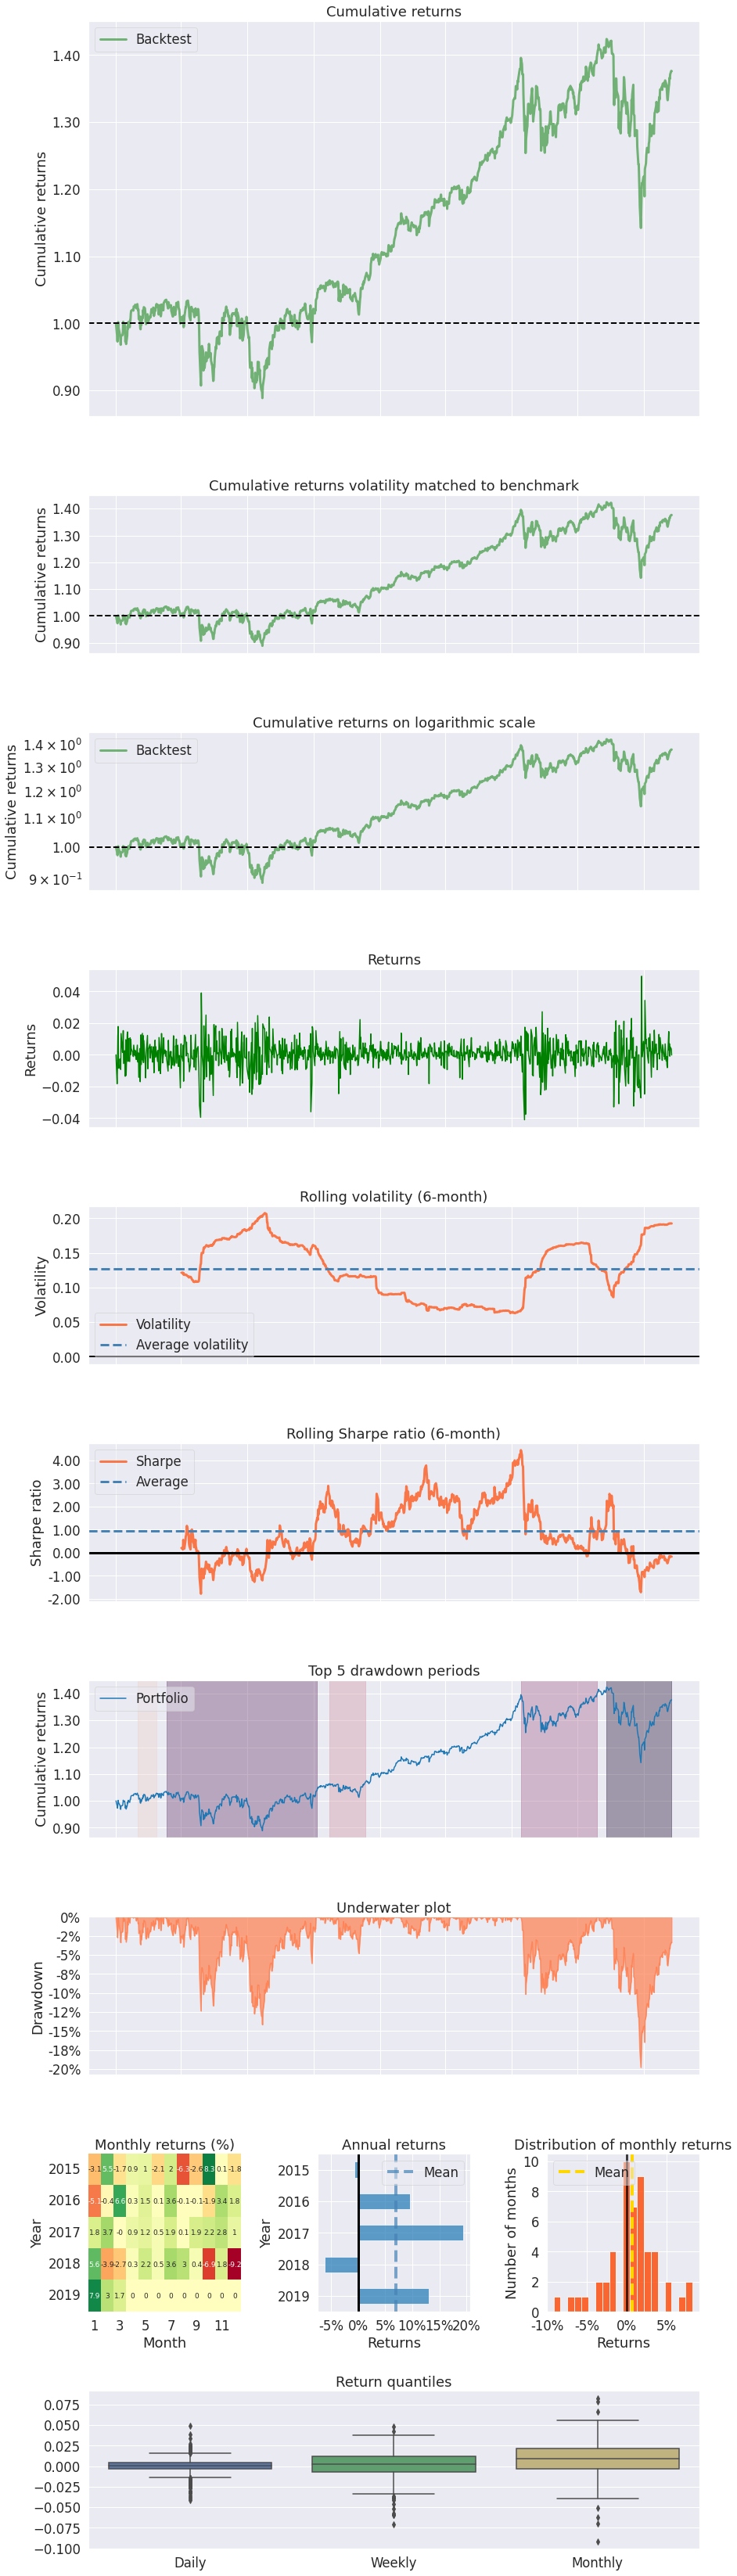

In [2]:
import pandas as pd
import pyfolio as pf

df = pd.read_csv("sp500.csv", index_col="date", parse_dates=["date"])
df = df.pct_change()
returns_sp500 = df.fillna(0)

# Ensure the returns are a series
returns=pd.Series(returns_sp500['S&P500'])

# Create the returns tear sheet
fig = pf.create_returns_tear_sheet(returns, return_fig=True)

### **Industry exposures with Pyfolio**

You saw in the first video of this chapter how to use a `groupby` function to create the active weights per industry. The drawback is that it takes a snapshot at a given  time. Since portfolio weights change, you can imagine that the industry exposures change over time as well. However, the calculation to determine industry exposures on each day for your portfolio, can become quite tedious and complex.

Luckily, you can use Pyfolio's tear sheet for this. The tear sheet shows you **exposures over time**, and summarizes overall top stock picks in your portfolio. Available is data on your portfolio returns under `returns`, and your daily positions in dollar value per stock, under `positions`. Go ahead and inspect `positions` and `returns` in the console.

* Inspect `positions` and `returns` in the console. Then, assign the `Technology` sector to the DELL stock in your sector mapping. Notice that the sector mapping assigns an industry to each stock in your portfolio.

* Create the position tear sheet by inputting first `returns` and then `positions` into the function.You can open the position tear sheet in the HTML viewer window by clicking the arrows on the HTML viewer tab.

Top 10 long positions of all time,max
COST,90.01%
DELL,85.73%
CERN,83.53%
MMM,82.09%
INTC,78.59%
AMD,75.76%
GPS,62.24%


Top 10 short positions of all time,max
AMD,-30.12%
DELL,-26.58%
CERN,-25.51%
COST,-22.72%
MMM,-22.62%
GPS,-20.09%
INTC,-18.47%


Top 10 positions of all time,max
COST,90.01%
DELL,85.73%
CERN,83.53%
MMM,82.09%
INTC,78.59%
AMD,75.76%
GPS,62.24%


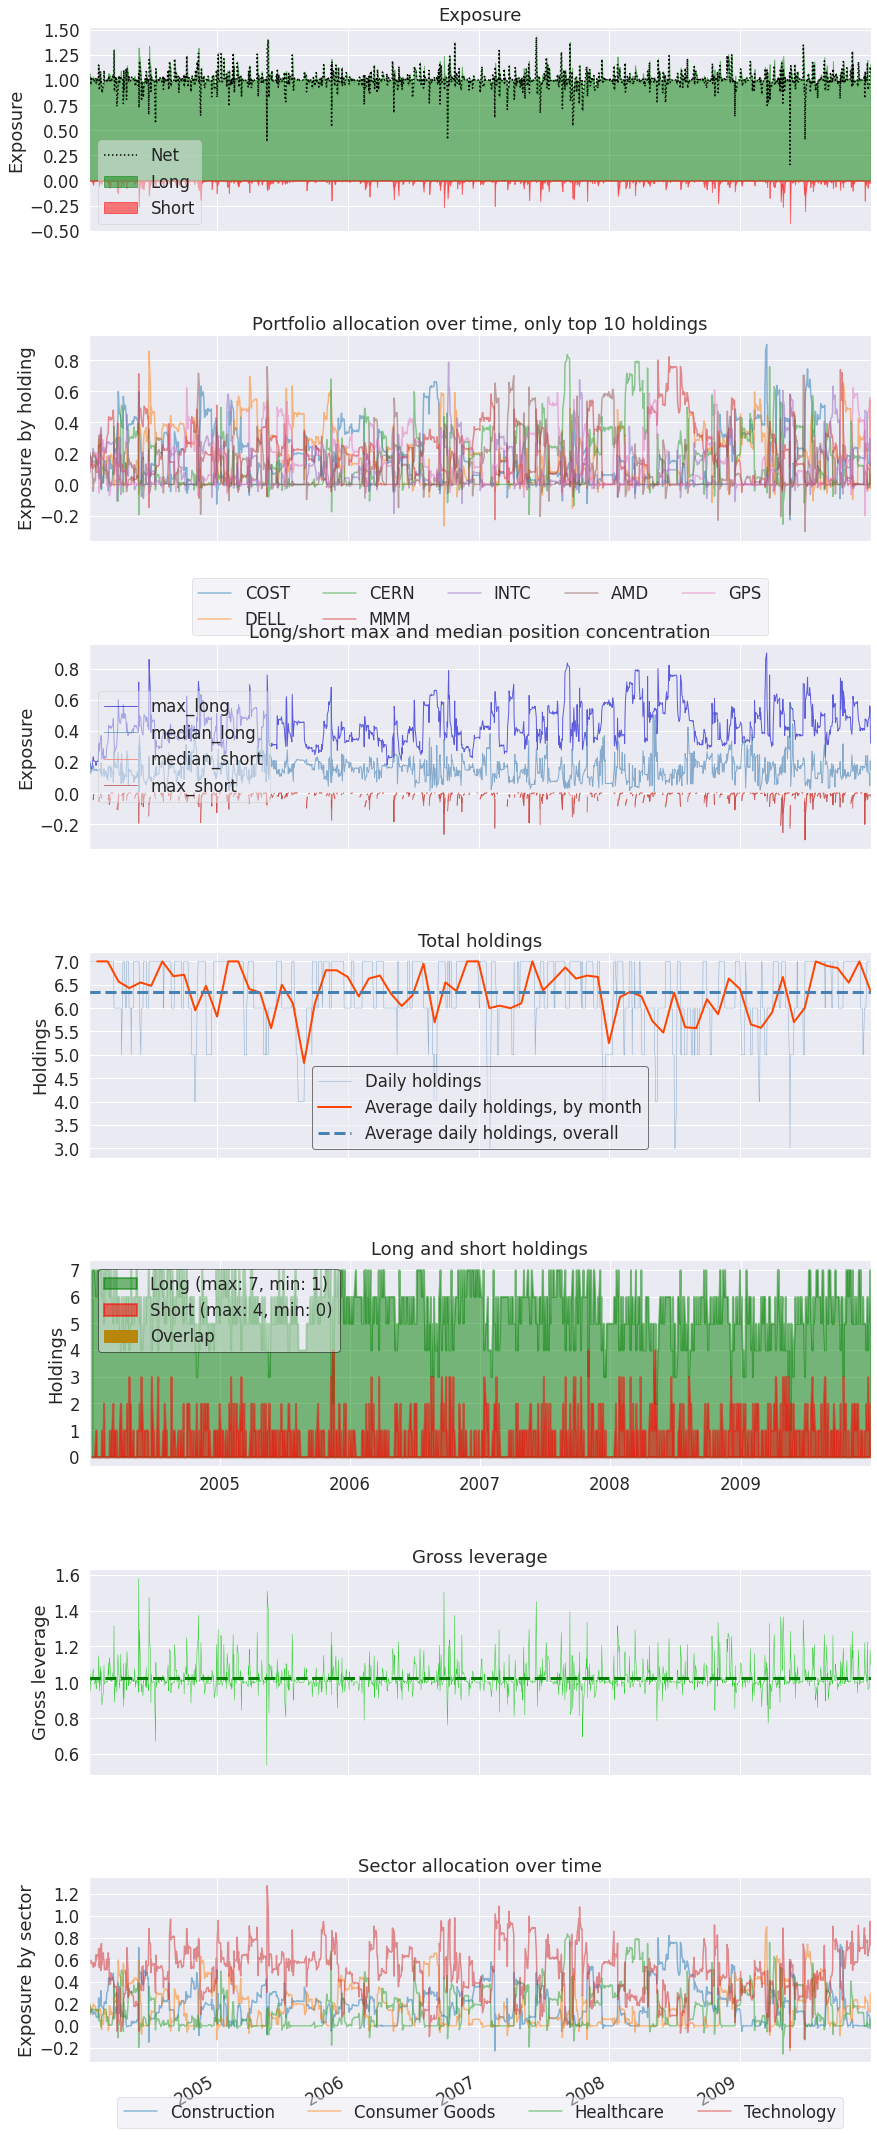

In [8]:
import pandas as pd
import pyfolio as pf

positions = pd.read_csv("positions.csv", index_col="index", parse_dates=["index"])
returns = pd.read_csv("returns.csv", parse_dates=["Unnamed: 0"])
returns.rename(columns={"Unnamed: 0": "0"}, inplace=True)
returns = pd.Series(returns['val'].values, index=returns['0'])
          
# Define sector mappings
sect_map = {'COST': 'Consumer Goods',
            'INTC': 'Technology', 
            'CERN': 'Healthcare', 
            'GPS': 'Technology',
            'MMM': 'Construction', 
            'DELL': 'Technology', 
            'AMD': 'Technology'}

# Create sector exposure tear sheet
pf.create_position_tear_sheet(returns, positions, sector_mappings=sect_map)

**COST** is the top position over time, and the biggest exposure is to the **Technology** sector.





In [9]:
positions.head()

,AMD,CERN,COST,DELL,GPS,INTC,MMM,cash
index,,,,,,,,
2004-01-09 00:00:00+00:00,6961.92,21017.07875,7282.266152,21264.55188,7091.080020,21259.333890,21316.129606,-6192.360298
2004-01-12 00:00:00+00:00,18198.58,18071.25000,17675.836401,10804.31924,10685.411865,17872.477480,10882.026400,-3329.289887
2004-01-13 00:00:00+00:00,12060.86,11942.24625,12838.477446,16078.90380,16272.139000,12465.392511,12579.135758,4708.039735
2004-01-14 00:00:00+00:00,13102.40,15534.28125,14447.422640,15414.45080,15666.440185,14884.069620,13454.542620,-2749.470030
2004-01-15 00:00:00+00:00,15518.40,14547.05000,14164.039680,14407.48813,14926.122619,14422.385864,13929.159049,-2462.919316


In [4]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 3.4 MB/s 
     |████████████████████████████████| 2.8 MB 10.4 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [18]:
!pip install pandas_datareader --upgrade

     |████████████████████████████████| 109 kB 4.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


# **Optimal Weights**

$$\min_{\mathbf{\omega}} \mathbf{\omega}^T\mathbf{\sum}\mathbf{\omega}$$

subject to 

\begin{align*}
\mathbf{\omega}^T\mu \ \ &  \geq \ \  \mu^*\\
\mathbf{\omega}^T\cdot\mathbf{1} \ \ & = \ \ 1\\
\forall i, \omega_i \ \ & \geq \ \ 0
\end{align*}

where 
* $\mathbf{\omega}^T\mu$ is the expected return
* $\mu^*$ is the target return

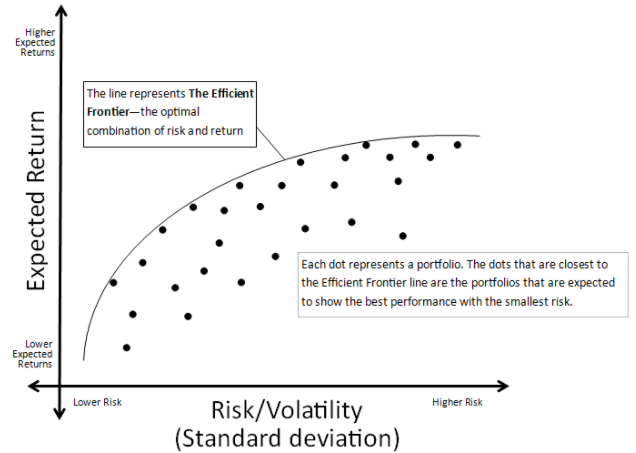

## **PyPortfolioOpt for portfolio optimization**

### **Calculating expected risk and returns**

For this exercise, you're going to start with the **raw price** data. What you'll need for portfolio optimization, is the expected risk and return from this data.

With `PyPortfolioOpt`, you can calculate the expected risk and return in just one line of code, so that makes it very easy for you. The library you need is called `pypfopt` in short. FYI, you'll see in the next exercise that `PyPortfolioOpt` gives you the same output if you were to calculate it by hand. 

* Import the `risk_models` and `expected_returns` functions from the `PyPortfolioOpt` library as well the `EfficientFrontier` function from the `efficientfrontier` package.

* Calculate the expected returns from the `stock_prices` data.
* Calculate the covariance matrix from the `stock_prices`.
* Get the efficient frontier by inputting `mu` and `Sigma`, and print `mu` and `Sigma` to see what these inputs for the EF look like.

In [18]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [6]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

stock_prices = pd.read_csv("small_portfolio.csv", index_col=["date"], parse_dates=["date"])

print("stock_prices.head()")
display(stock_prices.head())

# Calculate expected returns mu 
μ  = expected_returns.mean_historical_return(stock_prices)

# Calculate the covariance matrix S
Σ = risk_models.sample_cov(stock_prices)

# Obtain the efficient frontier
ef = EfficientFrontier(μ, Σ)
print(μ, Σ)

stock_prices.head()


,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


GE     -0.175812
JPM     0.185643
MSFT    0.223083
PG     -0.045684
dtype: float64             GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810


Now that you have calculated the efficient frontier with your given measures of expected risk and return, you can select an optimal portfolio from that frontier, that fits your risk and return appetite. That might be the portfolio with the Maximum Sharpe ratio, or even the portfolio with the lowest level of risk.

### **PyPortfolioOpt risk functions**

The objective of the Markowitz portfolio optimization problem is to <ins>minimize the portfolio variance</ins>, given a bunch of constraints. Do you remember how you calculate this from chapter 2? Portfolio variance = weights transposed * covariance matrix * weights. With `PyPortfolioOpt` we call the covariance matrix `sigma`, to denote that this is a sample covariance.

In this exercise you will see that the `PyPortfolioOpt` functions to calculate `sigma`, gives the exact same result if you were to calculate the covariance by hand. The same goes for the expected return calculations, you can also verify `PyPortfolioOpt` gives the same output as calculating annualized daily returns by hand. Available are the `stock_prices`. 

* Transform the stock prices data `stock_prices` to a returns series, by using the function `pct_change()`.
* Obtain the covariance matrix of the returns, and annualize it by multiplying it with 252 trading days.
* Repeat the covariance calculation and assign it to `Sigma`, but this time use the `PyPortfolioOpt` function `sample_cov()` from the `risk_models` module. Remember to input the price data, not the returns data here.
* Print your manually calculated covariance matrix, and `Sigma`, and compare the results.

In [7]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

stock_prices = pd.read_csv("small_portfolio.csv", index_col=["date"], parse_dates=["date"])

# Get the returns from the stock price data
returns=stock_prices.pct_change()

# Calculate the annualized covariance matrix 
covMatrix = returns.cov()*252

# Calculate the covariance matrix Sigma from a`PyPortfolioOpt` function
Σ = risk_models.sample_cov(stock_prices)

# Print both covariance matrices
display(Σ)
display(covMatrix)

,GE,JPM,MSFT,PG
GE,0.046355,0.023011,0.016415,0.010182
JPM,0.023011,0.047033,0.024328,0.010899
MSFT,0.016415,0.024328,0.054486,0.014257
PG,0.010182,0.010899,0.014257,0.020810


,GE,JPM,MSFT,PG
GE,0.046355,0.023011,0.016415,0.010182
JPM,0.023011,0.047033,0.024328,0.010899
MSFT,0.016415,0.024328,0.054486,0.014257
PG,0.010182,0.010899,0.014257,0.020810


### **Optimal portfolio performance**

Let's now continue with the efficient frontier `ef` that you calculated in a previous exercise for the small portfolio. You still need to select an optimal portfolio from that efficient frontier `ef`, and check its performance. Let's use the `efficient_return` option. This function selects the portfolio with the minimized risk given a target return. A portfolio manager is often asked to manage a portfolio under certain risk and return constraints, so this is a very useful function for that.

`mu` and `Sigma` are already calculated for you and ef is also available.

* Obtain an efficient return portfolio, with a target return of `0.2`. Store the weights of that portfolio under `weights`, then print and inspect the `weights`. Are there any stocks with zero weight?
* Obtain the performance report for your efficient return portfolio.

In [8]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

stock_prices = pd.read_csv("small_portfolio.csv", index_col=["date"], parse_dates=["date"])
μ  = expected_returns.mean_historical_return(stock_prices)
Σ = risk_models.sample_cov(stock_prices)
ef = EfficientFrontier(μ, Σ)

# Get the minimum risk portfolio for a target return of 0.2 (20%)
weights = ef.efficient_return(0.2)
print(weights)

# Show portfolio performance 
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.0), ('JPM', 0.4926529085352377), ('MSFT', 0.4900890447252643), ('PG', 0.0172580467394981)])
Expected annual return: 20.0%
Annual volatility: 19.2%
Sharpe Ratio: 0.94


(0.2, 0.19152666984849026, 0.9398168941296344)

In [9]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

stock_prices = pd.read_csv("small_portfolio.csv", index_col=["date"], parse_dates=["date"])
μ  = expected_returns.mean_historical_return(stock_prices)
Σ = risk_models.sample_cov(stock_prices)
ef = EfficientFrontier(μ, Σ)

# Get the minimum risk portfolio for a target return of 0.2 (20%)
weights = ef.max_sharpe()
print(weights)

# Show portfolio performance 
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.0), ('JPM', 0.4251955192429594), ('MSFT', 0.5748044807570406), ('PG', 0.0)])
Expected annual return: 20.7%
Annual volatility: 19.6%
Sharpe Ratio: 0.96


(0.20716402573897588, 0.1959516973774276, 0.9551538886569299)

The portfolio that optimizes to obtain the maximum Sharpe ratio has different weights than the portfoliowith a target return of 0.2

### **Min Volatility Portfolio**

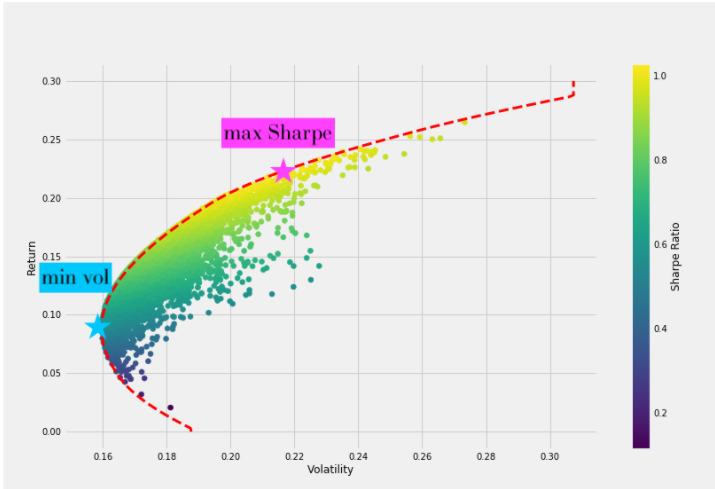

In [11]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

stock_prices = pd.read_csv("small_portfolio.csv", index_col=["date"], parse_dates=["date"])
μ  = expected_returns.mean_historical_return(stock_prices)
Σ = risk_models.sample_cov(stock_prices)
ef = EfficientFrontier(μ, Σ)

# Get the minimum risk portfolio for a target return of 0.2 (20%)
weights = ef.min_volatility()
print(weights)

# Show portfolio performance 
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.1573217875054168), ('JPM', 0.117142142133372), ('MSFT', 0.0470376255528438), ('PG', 0.6784984448083673)])
Expected annual return: -2.6%
Annual volatility: 13.3%
Sharpe Ratio: -0.35


(-0.026415861751657242, 0.1329238660783018, -0.3491913312566076)

### **Portfolio optimization: Max Sharpe**

Calculate the portfolio that gives the Maximum Sharpe ratio. Often, this is the portfolio the investor wants to invest in, as it provides the <ins>highest possible return to risk ratio</ins>. PyPortfolioOpt makes it very easy to calculate this portfolio from a set of historical price data.

Available for you are the mean historic return for a small portfolio of stocks under `mu` and a covariance matrix belonging to our portfolio under `Sigma`. You'll need these as inputs to calculate the Efficient Frontier and Maximum Sharpe portfolio. 

* Use the console to print the expected returns `mu` and covariance matrix `Sigma` to make sure you know what the inputs look like. Then, define the efficient frontier using `mu`, and `Sigma` in the script.

* Determine the raw weights using the Maximum Sharpe optimizer, then get the clean weights for the best interpretation of the portfolio weights. Check what is printed for `raw_weights_maxsharpe` and `cleaned_weights_maxsharpe` in the console.

In [19]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

stock_prices = pd.read_csv("small_portfolio.csv", index_col=["date"], parse_dates=["date"])
μ  = expected_returns.mean_historical_return(stock_prices)
Σ = risk_models.sample_cov(stock_prices)
ef = EfficientFrontier(μ, Σ)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()
print(raw_weights_maxsharpe)
print(cleaned_weights_maxsharpe)

OrderedDict([('GE', 0.0), ('JPM', 0.4251955192429594), ('MSFT', 0.5748044807570406), ('PG', 0.0)])
OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])


Some weights in the Maximum Sharpe portfolio are zero because some of the expected returns of the stocks are negative, e.g., GE and PG. That does not necessarily exclude them from the Maximum Sharpe portfolio, but in this case, those negative stocks just lower returns without lowering the risk of the portfolio. That's why they are not part of the optimal risk-return portfolio.

### **Minimum volatility optimization**

You're going to compare the *minimum volatility* and the *Maximum Sharpe* portfolios. As a portfolio manager you often want to understand how your chosen portfolio measures up to the minimum volatility portfolio. With `PyPortfolioOpt` you can compare the two quickly, without having to write two different constrained optimization problems, which can be quite complex. Available for you is the efficient frontier from the previous exercise under `ef`. 

* Inspect the Maximum Sharpe portfolio from the previous exercise by using `portfolio_performance()` numbers from `ef`.

In [21]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

stock_prices = pd.read_csv("small_portfolio.csv", index_col=["date"], parse_dates=["date"])
μ  = expected_returns.mean_historical_return(stock_prices)
Σ = risk_models.sample_cov(stock_prices)
ef = EfficientFrontier(μ, Σ)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()

# Show portfolio performance 
print(cleaned_weights_maxsharpe)
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])
Expected annual return: 20.7%
Annual volatility: 19.6%
Sharpe Ratio: 0.96


(0.20716402573897588, 0.1959516973774276, 0.9551538886569299)

* Change the optimizer into the min vol optimizer, run the code again and inspect the weights and the performance numbers.

In [22]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

stock_prices = pd.read_csv("small_portfolio.csv", index_col=["date"], parse_dates=["date"])
μ  = expected_returns.mean_historical_return(stock_prices)
Σ = risk_models.sample_cov(stock_prices)
ef = EfficientFrontier(μ, Σ)

# Calculate weights for the minimum volatility portfolio
raw_weights_minvol = ef.min_volatility()
cleaned_weights_minvol = ef.clean_weights()

# Show portfolio performance
print(cleaned_weights_minvol)
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.15732), ('JPM', 0.11714), ('MSFT', 0.04704), ('PG', 0.6785)])
Expected annual return: -2.6%
Annual volatility: 13.3%
Sharpe Ratio: -0.35


(-0.026415861751657242, 0.1329238660783018, -0.3491913312566076)

### **Comparing max Sharpe to min vol**

The minimum volatility portfolio spreads the risk more by investing in all the stocks, although some have a negative performance, this leads to an overall lower performance, but also to lower risk.

### **Exponentially weighted returns and risk**

Perform portfolio optimization with a slightly different way of estimating risk and returns; you're going to give more weight to recent data in the optimization.

This is a smart way to deal with stock data that is typically non-stationary, i.e., when the distribution changes over time. Implementation can be quickly done by changing the risk model you use to calculate `Sigma`, and the returns calculation you use to get `mu`. The stock prices dataset is available as `stock_prices`. 

* Use the exponential weighted covariance matrix from `risk_models` and exponential weighted historical returns function from `expected_returns` to calculate `Sigma` and `mu`. Set the span to `180` and the frequency (i.e. the trading days) to `252`.
* Calculate the efficient frontier with the new `mu` and `Sigma`.
* Calculate the weights for the maximum Sharpe ratio portfolio.
* Get the performance report.


In [23]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

stock_prices = pd.read_csv("small_portfolio.csv", index_col=["date"], parse_dates=["date"])

# Define exponentially weightedSigma and mu using stock_prices
Σ = risk_models.exp_cov(stock_prices, span=180, frequency=252)
μ = expected_returns.ema_historical_return(stock_prices, frequency=252, span=180)

# Calculate the efficient frontier
ef = EfficientFrontier(μ, Σ)

# Calculate weights for the maximum sharpe ratio optimization
raw_weights_maxsharpe = ef.max_sharpe()

# Show portfolio performance 
ef.portfolio_performance(verbose=True)

Expected annual return: 27.1%
Annual volatility: 24.4%
Sharpe Ratio: 1.03


(0.27060086764443547, 0.24440611989379227, 1.0253461237113668)

### **Comparing approaches**

Investigate whether the maximum Sharpe portfolios differ when you are using the normal historic expected risk and returns, and when using the exponentially weighted risk and returns. The exponentially weighted volatility follows the real volatility much closer, but do you actually see a big difference in the portfolio weights when using one, or the other? 

Since the span is relatively long, and the trends are persistent, this means that the more recent data is pretty similar to the full dataset.

### **Changing the span**

The span of the exponentially weighted risk and return can have an impact on what the optimal portfolio looks like. In fact, the span has a very big influence! By setting the span, you can either use data for say only the most recent days, or use data from the most recent years. In the limit, when the span is as long as the full sample, it will be equal to using the normal historic mean.

Now let's get a feel for how a short and long span changes your optimal portfolio. Available is the `stock_prices` data.

* Set a really long span of 2 years of trading days, assuming that one year has 252 days.

In [24]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

stock_prices = pd.read_csv("small_portfolio.csv", index_col=["date"], parse_dates=["date"])

# Calculate expected returns and sample covariance
mu_ema = expected_returns.ema_historical_return(stock_prices, span=2*252 ,frequency=252)
Sigma_ew = risk_models.exp_cov(stock_prices, span=2*252, frequency=252)
ef_2 = EfficientFrontier(mu_ema, Sigma_ew)

# Calculate weights for the maximum Sharpe ratio portfolio
weights = ef_2.max_sharpe()
cleaned_weights_maxsharpe_EW = ef_2.clean_weights()
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 30.3%
Annual volatility: 18.5%
Sharpe Ratio: 1.53


* Change the span to 10 days, and see how that changes your optimal portfolio.

In [25]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

stock_prices = pd.read_csv("small_portfolio.csv", index_col=["date"], parse_dates=["date"])

# Calculate expected returns and sample covariance
mu_ema = expected_returns.ema_historical_return(stock_prices, span=10 ,frequency=252)
Sigma_ew = risk_models.exp_cov(stock_prices, span=10, frequency=252)
ef_2 = EfficientFrontier(mu_ema, Sigma_ew)

# Calculate weights for the maximum Sharpe ratio portfolio
weights = ef_2.max_sharpe()
cleaned_weights_maxsharpe_EW = ef_2.clean_weights()
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 12.8%
Annual volatility: 17.0%
Sharpe Ratio: 0.63


* If your data is very volatile and changes rapidly, working with a short span might give you better predictive power of the expected return, with a faster moving investment strategy. 

* However, if your data is rather slow moving as is the case with this data, the short span does not help you in better predicting expected risk and returns.